In [1]:
import napari
from skimage.io import imread

import apoc
import pandas as pd

In [2]:
image = imread('../../data/human_mitosis_crop.tif')
annotation_image = imread('../../data/human_mitosis_crop_annotation.tif')

In [3]:
viewer = napari.Viewer()

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded
__init__.py (168): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


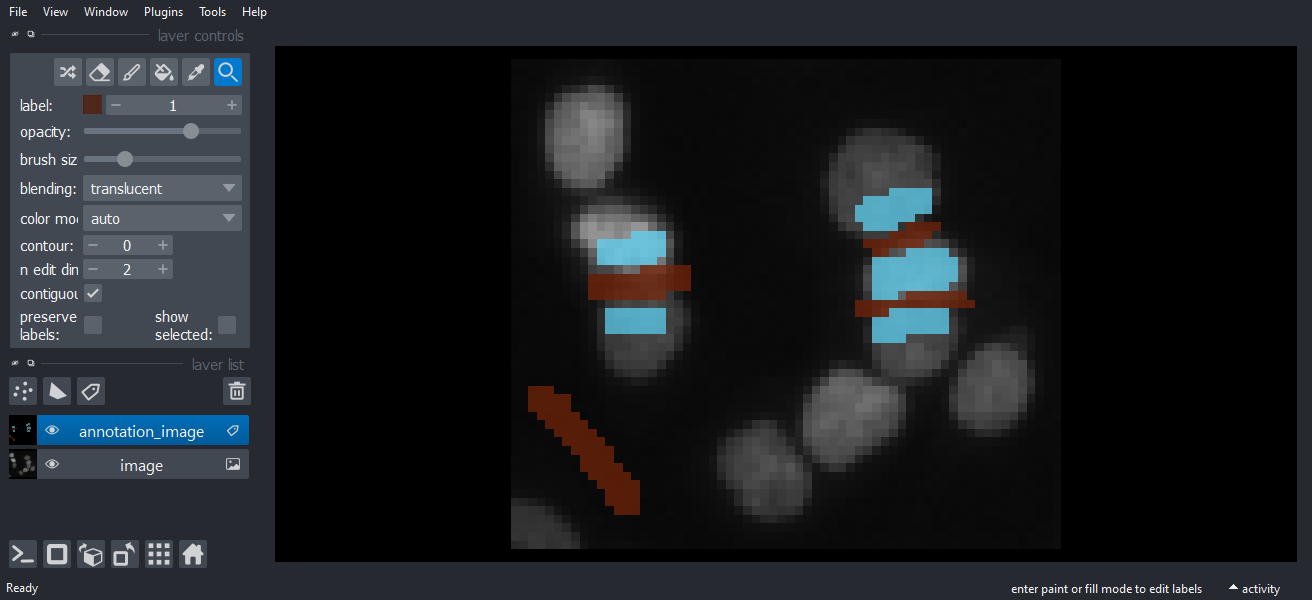

In [4]:
image_layer = viewer.add_image(image)
annotation_layer = viewer.add_labels(annotation_image)

napari.utils.nbscreenshot(viewer)

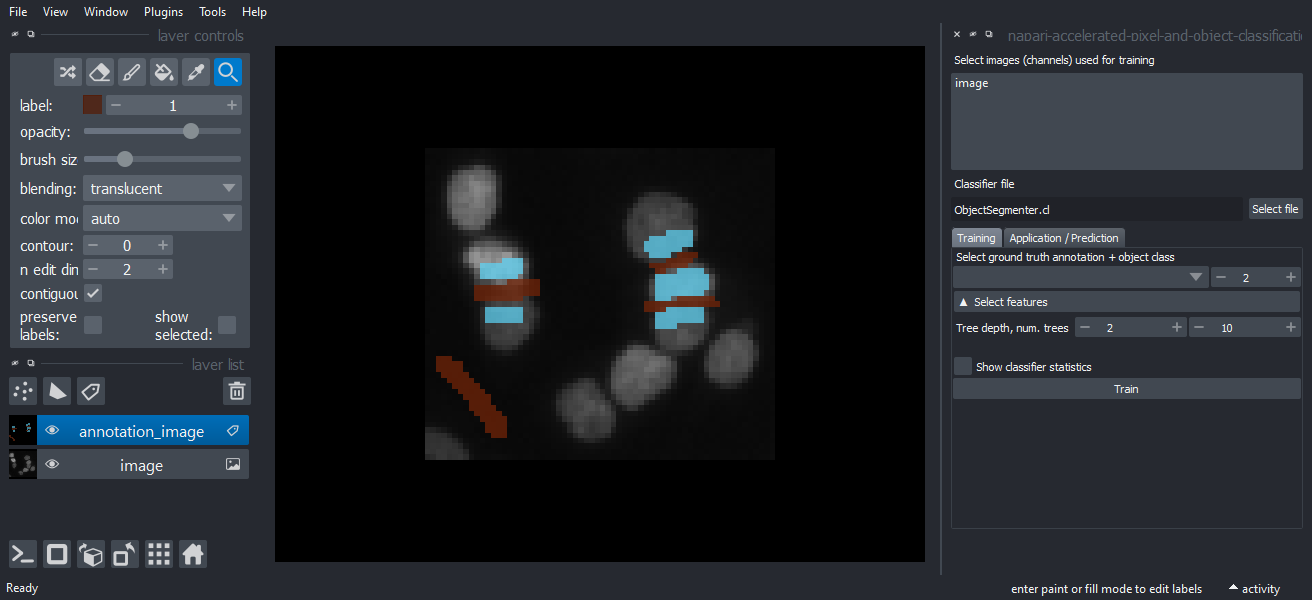

In [5]:
napoc_dock_widget, napoc_widget = viewer.window.add_plugin_dock_widget('napari-accelerated-pixel-and-object-classification', 'Object Segmentation')

napari.utils.nbscreenshot(viewer)

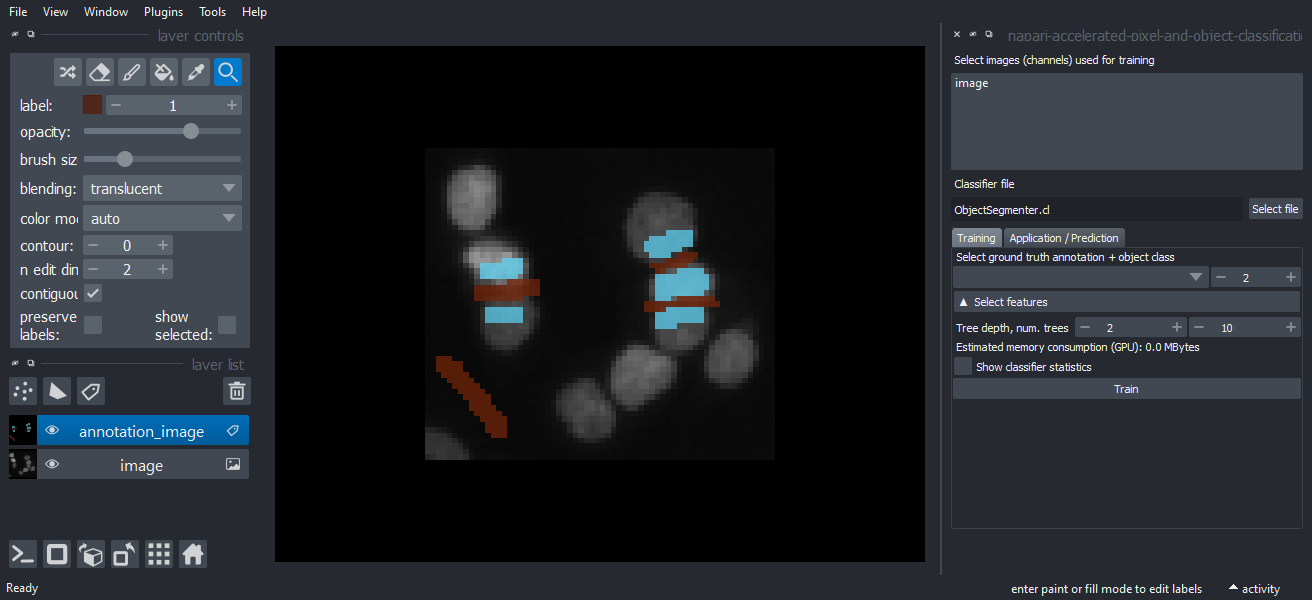

In [6]:
napari.utils.nbscreenshot(viewer)

In [7]:
object_segmenter = apoc.ObjectSegmenter('../../data/human_mitosis_object_segmenter.cl',
                                       max_depth = 4,
                                       num_ensembles = 100
                                       )

selected_features = 'gaussian_blur=1 difference_of_gaussian=1 laplace_box_of_gaussian_blur=1 sobel_of_gaussian_blur=1'

object_segmenter.train(selected_features, annotation_image, image)

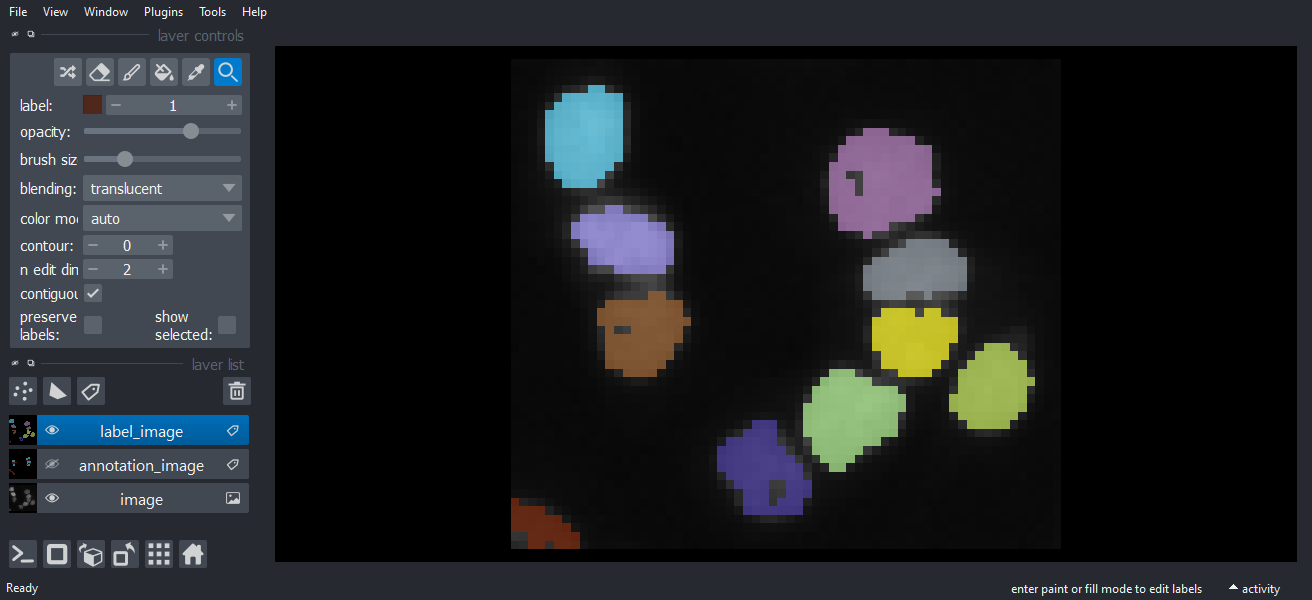

In [8]:
label_image = object_segmenter.predict(image)
labels_layer = viewer.add_labels(label_image)

napoc_dock_widget.hide()
annotation_layer.visible = False

napari.utils.nbscreenshot(viewer)

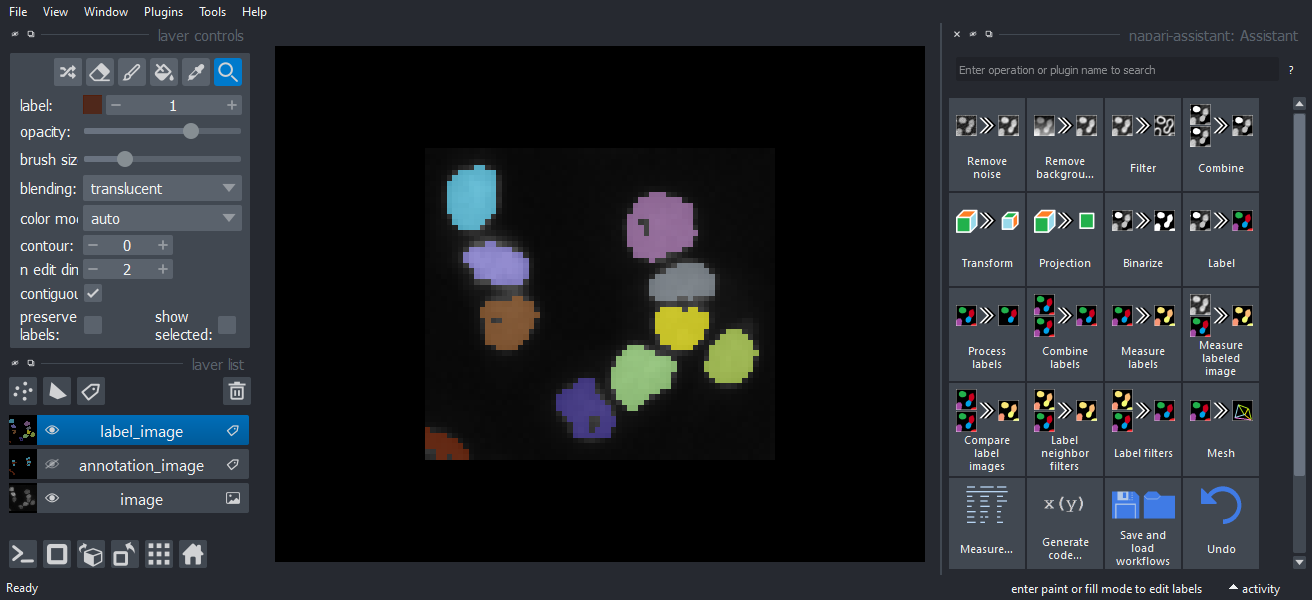

In [9]:
assistant_dock_widget, assistant = viewer.window.add_plugin_dock_widget('napari-assistant', 'Assistant')

napari.utils.nbscreenshot(viewer)

2022-05-22 14:38:01.373 | INFO     | napari_assistant._gui._category_widget:call_op:162 - exclude_labels_on_edges (clesperanto)(..., )
2022-05-22 14:38:01.418 | INFO     | napari_assistant._gui._category_widget:call_op:162 - closing_labels (clesperanto)(..., 2.0)


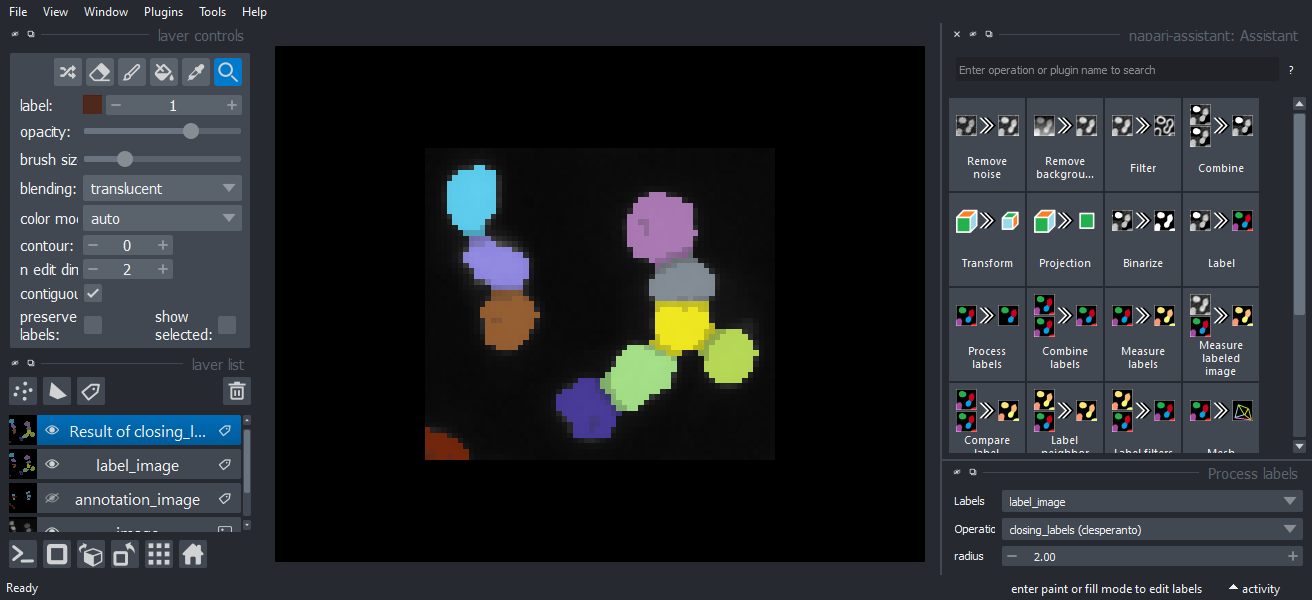

In [10]:
import napari_assistant
gui = assistant._activate(napari_assistant._categories.CATEGORIES['Process labels'])
gui.op_name.value = 'closing_labels (clesperanto)'

napari.utils.nbscreenshot(viewer)

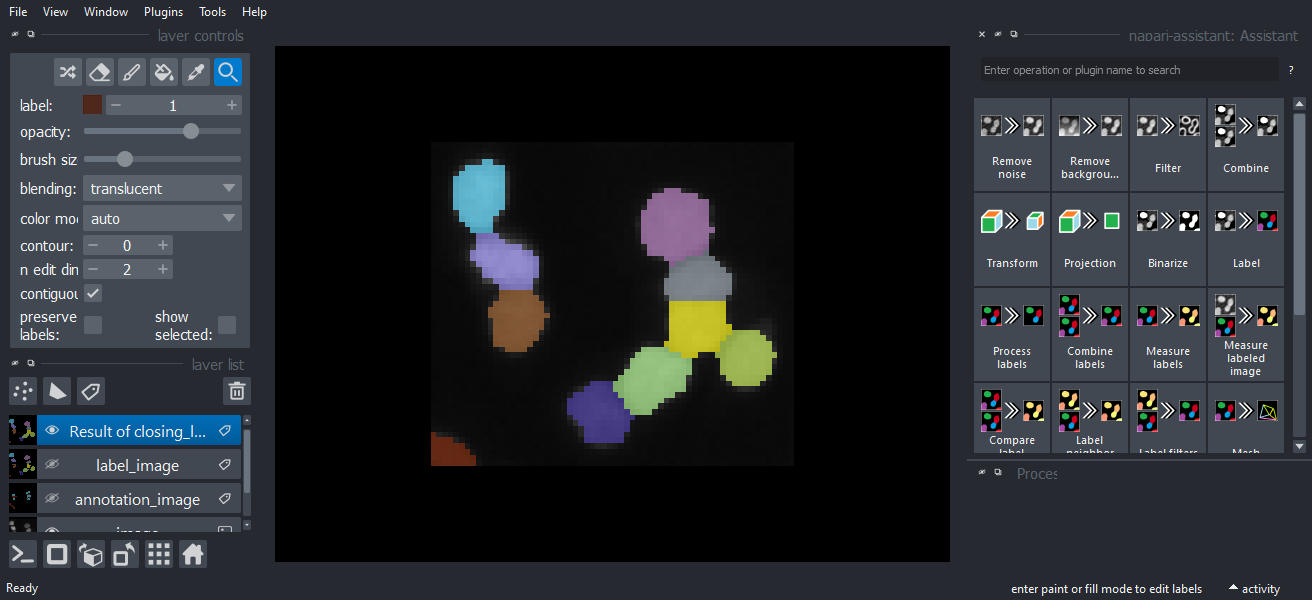

2022-05-22 14:39:06.927 | INFO     | napari_assistant._gui._category_widget:call_op:162 - voronoi_otsu_labeling (clesperanto)(..., 2.0, 2.0)
2022-05-22 14:39:12.459 | ERROR    | napari_assistant._gui._category_widget:gui_function:415 - An error has been caught in function 'gui_function', process 'MainProcess' (9480), thread 'MainThread' (22072):
Traceback (most recent call last):

  File "C:\Users\rober\miniconda3\envs\bio_39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x0000021C2D3E82F0, file "C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\ipykernel_launcher...
           └ <function _run_code at 0x0000021C2D6D5D30>

  File "C:\Users\rober\miniconda3\envs\bio_39\lib\runpy.py", line 87, in _run_code
    exec(code, run_global

In [12]:
labels_layer.visible = False

corrected_labels_layer = viewer.layers[-1]
corrected_labels_image = corrected_labels_layer.data

napari.utils.nbscreenshot(viewer)